# Exploratory Data Analysis: Emergency Department Wait Time Prediction

This notebook performs an exploratory data analysis on emergency department wait time data. Our target variable is `tiempo_total`, which represents the total waiting time for patients in the emergency department.

## 1. Import Required Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy import stats

# Set style for better visualizations
plt.style.use('ggplot')
sns.set_palette('husl')

# Display all columns
pd.set_option('display.max_columns', None)

## 2. Load and Inspect the Data

In [12]:
# Load the dataset
df = pd.read_csv('../data/processed/ARTICLE.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

# Display first few rows
print("\nFirst few rows of the dataset:")
df.head()

Dataset Shape: (213999, 110)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213999 entries, 0 to 213998
Columns: 110 entries, edad to 99
dtypes: float64(104), int64(6)
memory usage: 179.6 MB

First few rows of the dataset:


,edad,tiempo_total,clasificacion_encode,genero_Femenino,genero_Masculino,hora,minuto,mes,dia,dia_semana,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,42.0,44.0,1,0.0,1.0,8,46,8,16,0,-0.211228,-0.135058,-0.068011,0.114623,0.186367,-0.022991,0.001307,0.028512,0.192578,-0.038619,0.049999,0.001810,-0.107599,0.052530,0.117730,-0.052327,0.093295,-0.011765,-0.050515,-0.116485,0.103166,0.024035,0.005641,0.096171,-0.256615,-0.015903,0.011168,-0.173767,0.027981,-0.069062,-0.232104,-0.015811,-0.064491,0.105173,0.049577,0.143041,-0.052393,0.035851,-0.209517,0.093292,-0.100400,0.066474,0.110108,0.063936,0.050436,0.029254,-0.274927,-0.009185,-0.185906,-0.020850,0.143693,-0.011586,0.174226,-0.218605,-0.126760,-0.165535,0.058864,-0.100331,-0.048993,-0.346932,-0.013396,0.013016,0.066390,-0.163742,0.001491,-0.189219,-0.114358,0.097951,-0.259715,-0.218441,0.092031,-0.151107,-0.243418,0.019364,0.139846,-0.020956,-0.003926,0.040586,-0.065903,0.048040,-0.075881,0.154372,0.105861,-0.023694,0.058988,0.074926,0.202824,-0.113748,0.142866,0.079249,0.095822,0.355246,0.169132,0.103854,-0.090382,0.199301,-0.098716,0.017857,-0.196253,0.112939
1,45.0,51.0,1,1.0,0.0,9,0,8,16,0,-0.107917,0.118814,-0.040706,-0.009817,0.093661,-0.158248,-0.093622,0.117249,0.070204,-0.101353,-0.013058,-0.260134,-0.148057,0.179058,0.197872,0.125366,0.121591,0.088792,-0.041405,-0.074446,0.048826,-0.076056,0.032049,-0.001118,-0.003895,0.053024,-0.155327,-0.007696,0.056173,0.047186,0.172342,-0.052921,-0.099778,-0.107606,0.050607,0.161509,0.190891,-0.059583,-0.021694,-0.023150,-0.204974,-0.183030,0.119073,-0.004029,0.069391,-0.133241,0.139105,0.075526,-0.015804,-0.149438,0.128118,0.051124,0.048550,0.066253,-0.023264,0.092077,0.153611,0.049866,0.034602,-0.013197,-0.121031,0.063352,-0.005788,0.185284,-0.015693,-0.067045,-0.012883,0.011644,-0.223698,0.184497,-0.114181,-0.104347,0.123682,-0.075629,0.090214,0.000144,-0.035603,0.047766,0.076104,0.162029,-0.100137,0.171708,0.044147,0.087557,0.019974,0.017349,0.062505,-0.083806,0.123572,0.059157,0.046387,0.138000,-0.021263,-0.132192,0.076700,0.071337,0.107455,0.081768,0.025577,-0.005739
2,33.0,53.0,1,1.0,0.0,9,44,8,16,0,-0.025738,0.149419,0.107391,0.108886,0.151070,-0.086190,0.000581,0.114889,-0.094625,-0.040208,-0.097686,0.091896,0.217478,-0.050584,-0.109621,-0.079218,0.008069,-0.059304,0.200083,0.004127,0.123840,-0.087763,0.005500,0.114934,0.307650,-0.085411,0.112107,0.148373,-0.238814,0.051388,-0.129547,0.090839,0.017995,-0.103817,0.093823,-0.121855,-0.292845,0.069414,0.016963,0.055084,-0.058794,0.047605,0.050040,-0.159071,-0.310833,0.000075,-0.033805,-0.177506,-0.226629,0.073345,0.019112,-0.108370,-0.218061,-0.071836,0.108187,-0.056269,0.007646,-0.073346,-0.169741,0.188768,-0.046191,-0.025001,-0.138327,-0.157404,-0.118316,0.106694,0.124093,0.210055,-0.015097,-0.010822,-0.177493,0.088002,0.240246,-0.068676,-0.088121,0.005294,-0.076173,-0.121249,0.183660,0.119398,-0.193226,-0.113829,-0.025467,-0.107237,-0.091973,0.079843,-0.021127,0.003799,0.106978,0.026640,-0.148776,-0.056086,-0.070932,0.078025,0.022943,-0.028348,0.083362,-0.026299,-0.062283,-0.002416
3,4.0,72.0,1,0.0,1.0,9,59,8,16,0,-0.033964,0.013105,-0.009341,0.009182,-0.197027,-0.068535,-0.041003,-0.034554,0.009488,-0.003458,-0.011008,-0.026808,0.028485,0.045688,-0.054577,-0.067728,0.055354,0.049828,-0.198724,-0.039895,0.203523,0.000028,-0.081367,0.063008,-0.020398,-0.219507,0.024644,0.139705,-0.089379,0.075648,0.067258,-0.122856,-0.020586,0.045640,-0.130549,0.075275,0.134885,0.165472,-0.089201,0.002448,-0.057289,-0.170800,-0.199562,-0.060496,-0.049295,0.117339,-0.048011,0.009439,-0.011657,-0.059505,0.087204,-0.096519,0.171019,0.053212,-0.049502,0.065959,0.064915,0.051494,0.163315,-0.006684,0.047334,0.119989,0.018163,0.047328,0.070995,0.029104,

## 3. Data Quality Check

In [13]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values('Percentage', ascending=False)

print("Missing Values Analysis:")
print(missing_df[missing_df['Missing Values'] > 0])

# Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

Missing Values Analysis:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

Number of duplicate rows: 0


## 4. Target Variable Analysis (tiempo_total)

Basic statistics of waiting time (tiempo_total):


count    213999.000000
mean         48.698601
std          23.793168
min           2.000000
25%          31.000000
50%          44.000000
75%          62.000000
max         121.000000
Name: tiempo_total, dtype: float64


Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x2f6e8f5e0>
Traceback (most recent call last):
  File "/Users/isaacmenchacapanecatl/Documents/hospital_wait_time_prediction/.venv/lib/python3.9/site-packages/matplotlib/transforms.py", line 198, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id_self: pop(k))
KeyboardInterrupt: 


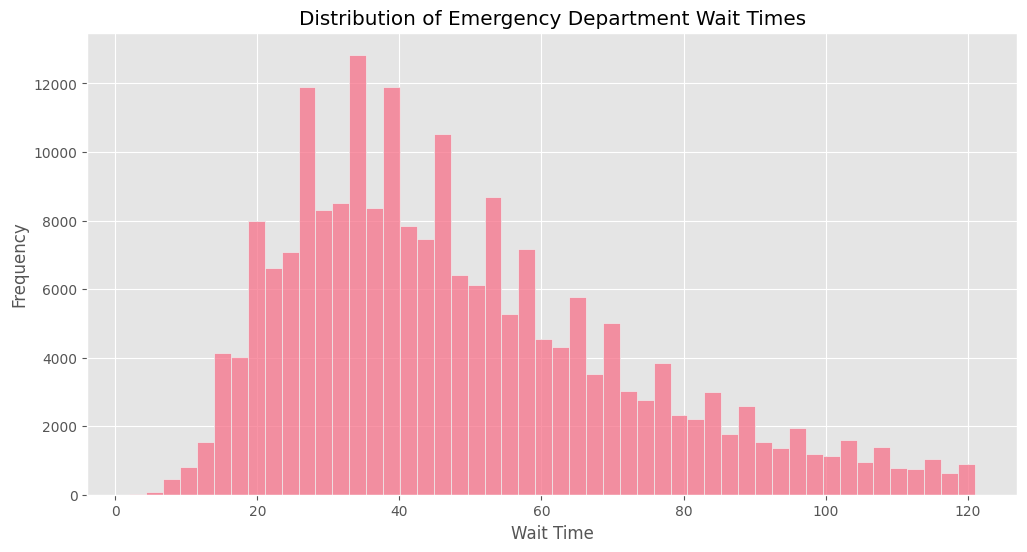

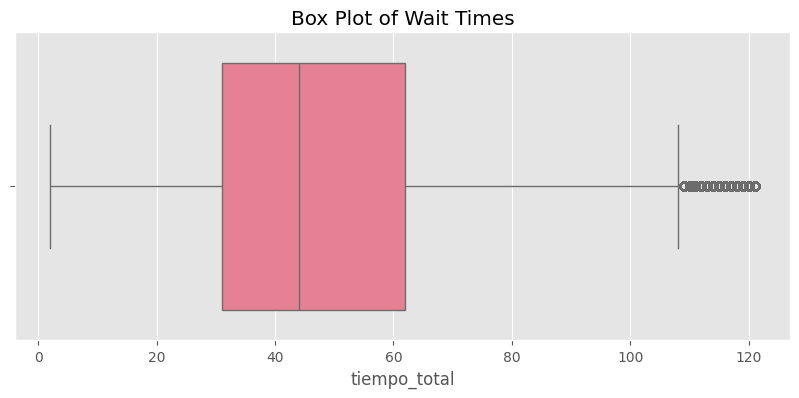

In [14]:
# Basic statistics of target variable
print("Basic statistics of waiting time (tiempo_total):")
print(df['tiempo_total'].describe())

# Create distribution plot
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tiempo_total', bins=50)
plt.title('Distribution of Emergency Department Wait Times')
plt.xlabel('Wait Time')
plt.ylabel('Frequency')
plt.show()

# Box plot for outlier detection
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['tiempo_total'])
plt.title('Box Plot of Wait Times')
plt.show()

## 5. Feature Analysis

Columns used for correlation analysis:
['edad', 'clasificacion_encode', 'genero_Femenino', 'genero_Masculino', 'hora', 'minuto', 'mes', 'dia', 'dia_semana']


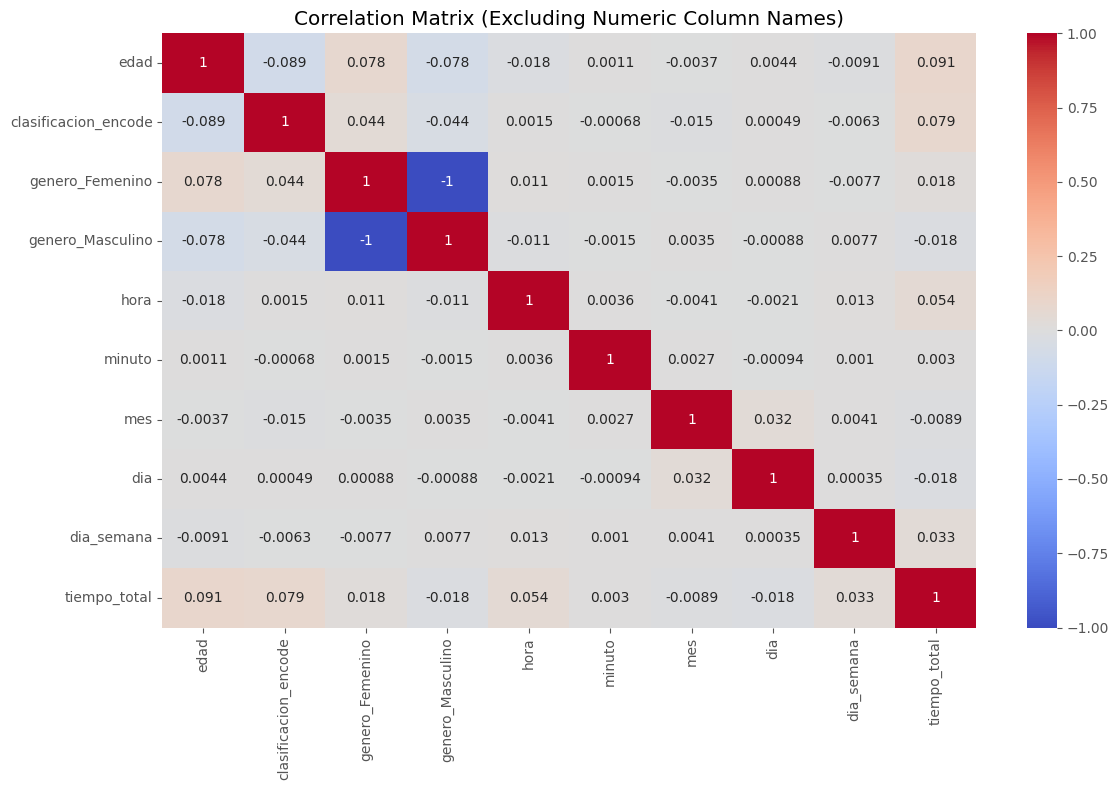

In [ ]:
# Numerical features analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop('tiempo_total') if 'tiempo_total' in numerical_cols else numerical_cols

# Filter out columns whose names are numbers
valid_numerical_cols = [col for col in numerical_cols if not str(col).replace('.', '').isdigit()]

# Print the columns being used for correlation analysis
print("Columns used for correlation analysis:")
print(valid_numerical_cols)

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df[valid_numerical_cols + ['tiempo_total']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Excluding Numeric Column Names)')
plt.tight_layout()
plt.show()

# Categorical features analysis
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    value_counts = df[col].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Box plot of wait times by category
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=col, y='tiempo_total')
    plt.title(f'Wait Times by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 6. Time-based Analysis (if timestamp data is available)

In [15]:
# Check if there are any datetime columns
datetime_cols = df.select_dtypes(include=['datetime64']).columns

if len(datetime_cols) > 0:
    for col in datetime_cols:
        # Convert to datetime if not already
        df[col] = pd.to_datetime(df[col])
        
        # Extract time-based features
        df[f'{col}_hour'] = df[col].dt.hour
        df[f'{col}_day'] = df[col].dt.day
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_dayofweek'] = df[col].dt.dayofweek
        
        # Average wait time by hour
        plt.figure(figsize=(12, 6))
        hourly_avg = df.groupby(f'{col}_hour')['tiempo_total'].mean()
        sns.lineplot(x=hourly_avg.index, y=hourly_avg.values)
        plt.title(f'Average Wait Time by Hour ({col})')
        plt.xlabel('Hour of Day')
        plt.ylabel('Average Wait Time')
        plt.show()
        
        # Average wait time by day of week
        plt.figure(figsize=(12, 6))
        daily_avg = df.groupby(f'{col}_dayofweek')['tiempo_total'].mean()
        sns.barplot(x=daily_avg.index, y=daily_avg.values)
        plt.title(f'Average Wait Time by Day of Week ({col})')
        plt.xlabel('Day of Week (0=Monday)')
        plt.ylabel('Average Wait Time')
        plt.show()

## 7. Summary of Findings

Key insights from the EDA:
1. [To be filled after running the analysis]
2. [To be filled after running the analysis]
3. [To be filled after running the analysis]

## 8. Recommendations for Model Development

Based on the EDA, here are recommendations for developing the wait time prediction model:
1. [To be filled after running the analysis]
2. [To be filled after running the analysis]
3. [To be filled after running the analysis]